# Demographics, gender and groups

- Demographics of the database
- Gender proportion by group
- Sources of cites to Groups A and B

Import libraries and prepare the fonts and figure function

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import graph_tool.all as gt

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

In [3]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

Load the tables, clean them and merge them.

In [4]:
# Institutions

places = pd.read_csv('../../data/processed/institution.csv')

In [5]:
# World shapefile with some corrections

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.loc[world.name=='Norway', 'iso_a3'] = 'NOR'

world.loc[world.name=='France', 'iso_a3'] = 'FRA'

In [6]:
# People to calculate demographics

people = pd.read_csv('../../data/processed/people.csv')
people = people.dropna(subset=['Workplace-Institution'])

people = people.rename(columns={'Workplace-Institution': 'Handle'})

people = pd.merge(people, places[['Handle', 'alpha-3', 'region', 'sub-region']])

In [10]:
people.gender.value_counts(normalize=True)

male      0.729159
female    0.270841
Name: gender, dtype: float64

In [9]:
people.groupby('region').gender.value_counts(normalize=True)

region    gender
Africa    male      0.774648
          female    0.225352
Americas  male      0.792958
          female    0.207042
Asia      male      0.794320
          female    0.205680
Europe    male      0.676437
          female    0.323563
Oceania   male      0.769556
          female    0.230444
Name: gender, dtype: float64

In [13]:
# People to calculate demographics

people = pd.read_csv('../../data/processed/people.csv')

people = people.dropna(subset=['Workplace-Institution'])

people = people.rename(columns={'Workplace-Institution': 'Handle'})

people = pd.merge(people, places[['Handle', 'alpha-3', 'region', 'sub-region']])

people = people.rename(columns={'alpha-3': 'iso_a3'})

people = people.groupby(
    'iso_a3').gender.value_counts(normalize=True).rename('proportion').reset_index()

people = people[people['gender']=='male'].drop('gender', axis=1)

In [7]:
# Merge demographics into shapefile

world = pd.merge(world, people, how='left')

world = world[world.continent != 'Antarctica']

In [33]:
world.proportion.mean()

0.8001238061314742

In [31]:
world[world['iso_a3']=='RUS']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,proportion
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",0.491208


In [25]:
world.sort_values(by='proportion')

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,proportion
116,3474121,Europe,Moldova,MDA,18540.0,"POLYGON ((26.619 48.221, 26.858 48.368, 27.523...",0.315789
125,3047987,Europe,Albania,ALB,33900.0,"POLYGON ((21.020 40.843, 21.000 40.580, 20.675...",0.320000
117,21529967,Europe,Romania,ROU,441000.0,"POLYGON ((28.234 45.488, 28.680 45.304, 29.150...",0.396104
105,5789122,Asia,Kyrgyzstan,KGZ,21010.0,"POLYGON ((70.962 42.266, 71.186 42.704, 71.845...",0.454545
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",0.491208
...,...,...,...,...,...,...,...
156,6943739,South America,Paraguay,PRY,64670.0,"POLYGON ((-58.166 -20.177, -57.871 -20.733, -5...",NaN
160,265100,Asia,N. Cyprus,-99,3600.0,"POLYGON ((32.732 35.140, 32.802 35.146, 32.947...",NaN
167,3500000,Africa,Somaliland,-99,12250.0,"POLYGON ((48.948 11.411, 48.948 11.411, 48.942...",NaN
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.590 41.855, 20.523 42.218, 20.284...",NaN


/home/rdora/miniconda3/envs/femec/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


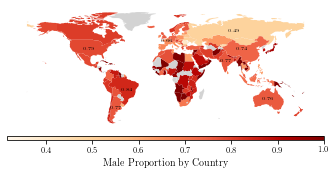

In [10]:
# Create world demographics

width = 345
f, ax = plt.subplots(figsize=set_size(width, fraction=1))
ax.axis('Off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3%", pad=0.1)

world.plot(column='proportion', legend=True,
           legend_kwds={'label': "Male Proportion by Country",
                       'orientation': 'horizontal'},
          cmap='OrRd',
          missing_kwds={'color': 'lightgray'}, ax=ax,
          cax=cax);
c = world[world.iso_a3.isin(['USA', 'RUS', 'AUS', 'CHN', 'BRA', 'FRA', 'IND',  'ARG'])]
c['coords'] = c['geometry'].apply(lambda x: x.representative_point().coords[:])
c['coords'] = c['coords'].apply(lambda x: x[0])
c['proportion'] = c['proportion'].round(2)
for idx, row in c.iterrows():
    ax.annotate(text=row['proportion'], xy=row['coords'],
                 horizontalalignment='center', fontsize=5)
f.tight_layout()
f.savefig('../../figures/world_proportion.pdf')

In [11]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,proportion
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.000000
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.857143
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.808346
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.789385
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.783784
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.500000
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.875000


# Female and male proportion by groups